In [9]:
'''
This code uses the created pca model to transform the data
'''
import numpy as np
import pandas as pd
import pickle
from PIL import Image
from time import perf_counter
import matplotlib.font_manager as font_manager

import matplotlib.pyplot as plt
with open('./pca.pkl','rb') as file:
	pca=pickle.load(file)



In [ ]:
#load pca model
def pca_transform(path,save_name):
	#load csv file
	
	df=pd.read_csv(path)
	image_locs=df['image-0'].tolist()
	n_samples=len(image_locs)
	image_locs1=image_locs[:int(n_samples/2)]
	image_locs2=image_locs[int(n_samples/2):]
	transformed=np.empty((n_samples,900))	
	image_array=np.empty((int(n_samples/2),200*200))
	for i, image_loc in enumerate(image_locs1):
		image=Image.open(image_loc)
		image=image.resize((200,200))
		image=np.reshape(np.array(image),(200*200))/255
		image_array[i]=image
	start=perf_counter()
	transformed[:int(n_samples/2)]=pca.transform(image_array)
	stop=perf_counter()
	print('Time:', stop-start,'Data',len(image_array))
	del image_array
	image_array=np.empty((n_samples-int(n_samples/2),200*200))
	for i, image_loc in enumerate(image_locs2):
		image=Image.open(image_loc)
		image=image.resize((200,200))
		image=np.reshape(np.array(image),(200*200))/255
		image_array[i]=image
	transformed[int(n_samples/2):]=pca.transform(image_array)
	print(transformed.shape)
	#np.save(save_name, transformed)
	
	
values=[['./Train_full_set.csv','./pca-train.npy'],
['./Val_full_set.csv','./pca-val.npy'],
['./Test_full_set.csv','./pca-test.npy']]
values=[['./Test_full_set.csv','./pca-test.npy']]
for i in range(len(values)):
	print('Transform: ',i)
	pca_transform(values[i][0],values[i][1])

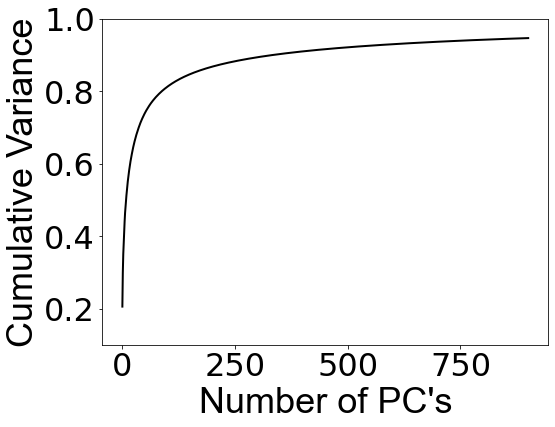

In [20]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
arial_font_path='/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
arial=font_manager.FontProperties(fname=arial_font_path, size=36)
plt.rcParams.update({'font.size': 14,    # Default font size
                     'axes.titlesize': 20,   # Title font size
                     'axes.labelsize': 16,   # Axes label font size
                     'xtick.labelsize': 32,  # X-axis tick label font size
                     'ytick.labelsize': 32}) # Y-axis tick label font size
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.ylim(0.1,1)
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, linewidth=2, color='black')
plt.xlabel('Number of PC\'s', font=arial)
plt.ylabel('Cumulative Variance', font=arial)
plt.show()